
## **Project Title:** **Amazon Web Scraping for Baby Products Insight**

### *Introduction:*

In the ever-evolving e-commerce landscape, understanding consumer preferences and identifying top-selling products is vital for businesses and analysts. As a data analyst, I embarked on a project aimed at unraveling the enigma of the most popular baby products available on Amazon. The objective was clear: provide valuable insights to a local client seeking to tap into this burgeoning market.

To achieve this goal, I employed a multifaceted approach, blending web scraping techniques with data cleaning, analysis, and visualization. Leveraging the power of Python, the BeautifulSoup library, and regular expressions, I navigated through the vast expanse of Amazon's product listings. The resulting data offered a treasure trove of information waiting to be unearthed.

This project wasn't just about raw data; it was about deciphering consumer trends, making sense of market dynamics, and presenting actionable insights. In this portfolio, I will detail the methods and tools used to collect, process, and analyze the data, ultimately revealing the top-selling baby products on Amazon.

From crawling the Amazon website to extract product data to the intricate process of data cleaning and analysis, this project represents a fusion of technical skills and data-driven decision-making. The final deliverable provides my client with a valuable understanding of the products that are currently in high demand in the baby product category.

By documenting this project in my portfolio, I hope to showcase my ability to translate data into actionable insights and to provide a glimpse into the world of web scraping, data cleaning, and analysis for those interested in the field of data analytics. Join me on this journey as we delve into the realm of e-commerce analytics and explore the fascinating universe of baby products on Amazon.

**Let start by importing necessary libraries**

In [6]:
from bs4 import BeautifulSoup   #library for web scraping
import requests                  # libary to request 

#data manipulation library
import pandas as pd
import numpy as np

#data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# os libraries 
import glob

i will be scraping through several pages so let me save this in **pageNumber** variable, which i will add to the request URL 

In [3]:
 pageNumber = 1

In [5]:
URL = f"https://www.amazon.com/s?k=baby+products&page=2&crid=WVVMACCVGJAT&qid=1697921832&sprefix=baby+product%2Caps%2C956&ref=sr_pg_{pageNumber}"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

page = requests.get(URL, headers=headers)

soup1 = BeautifulSoup(page.content, "html.parser")

soup2 = BeautifulSoup(soup1.prettify(), "html.parser")
print(soup2)

<!DOCTYPE html>

<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){retu

The content of the page is now saved in soup2 object, we proceed by grapping the desired text using MTML tags and classes

**Product Name**

In [7]:
product_names = soup2.find_all('h2', class_='a-size-mini a-spacing-none a-color-base s-line-clamp-3')

productNames =[]
for name  in product_names:
    product_name = name.get_text().strip('\n ')
    productNames.append(product_name)

    product_prices = soup2.find_all('span', class_='a-price-whole')

productPrices =[]
for price  in product_prices:
    product_price = price.get_text().strip(' \n ')[:7]
    productPrices.append(product_price)

product_ratings = soup2.find_all('div', class_='a-section a-spacing-none a-spacing-top-micro')

productRatings =[]
for rating  in product_ratings:
    product_rating = rating.get_text().strip(' \n')
    productRatings.append(product_rating)
    
    
order_infos = soup2.find_all('div', class_='a-row a-size-base')
orderInfo =[]
for info  in order_infos:
    product_info = info.get_text().strip(' \n \n')
    orderInfo.append(product_info)


In [9]:
print(productNames)
print("-" * 100)
print(productRatings)
print("-" * 100)
orderInfo

['Fisher-Price Baby Bouncer Rainforest Jumperoo Activity Center with Music Lights Sounds and Developmental Toys', 'Portable Baby Changing Pad, SKYROKU Detachable Travel Changing Pad, Smart Wipes Pocket with Built-in Pillow -Waterproof & Large Changing Area-Foldable Travel Baby Changing Kit(Grey)', 'BOLOLO Portable Milk Warmer with Super Fast Charging and Cordless, Instant breastmilk, Formula or Water Warmer with 10 Ounces Big Capacity, Baby Flask for Vehicle,car,Airplane Journey', 'Huggies Natural Care Sensitive Baby Wipes, Unscented, Hypoallergenic, 99% Purified Water, 64 Count (Pack 0f 12) (768 Wipes Total)', 'Fisher-Price Portable Baby Chair Sit-Me-Up Floor Seat With Developmental Toys & Machine Washable Seat Pad, Honeydew Drop', 'HIPHOP PANDA Baby Washcloths, Rayon Made from Bamboo - 2 Layer Soft Absorbent Newborn Bath Face Towel - Natural Baby Wipes for Delicate Skin - Baby Registry as Shower(6 Pack)', 'Maxi-Cosi 6-in-1 Minla High Chair, 6 Modes for Years of Growth, Essential Grey

['Price and other details may vary based on product size and color.',
 '500+ bought in past month',
 '1K+ bought in past month',
 '200+ bought in past month',
 '1K+ bought in past month',
 '50K+ bought in past month',
 '3K+ bought in past month',
 '10K+ bought in past month',
 '500+ bought in past month',
 '400+ bought in past month',
 '1K+ bought in past month',
 '4K+ bought in past month',
 '400+ bought in past month',
 '500+ bought in past month',
 '600+ bought in past month',
 '1K+ bought in past month',
 '8K+ bought in past month',
 '1K+ bought in past month',
 '50+ bought in past month',
 '200+ bought in past month',
 '200+ bought in past month',
 '4K+ bought in past month',
 '2K+ bought in past month',
 '3K+ bought in past month',
 '200+ bought in past month',
 '500+ bought in past month',
 '600+ bought in past month',
 '500+ bought in past month',
 '100+ bought in past month',
 '10K+ bought in past month',
 '400+ bought in past month',
 '1K+ bought in past month',
 '700+ bought

**Convert to dataframe**

In [12]:
min_length = min(len(productNames),len(productPrices),len(productRatings))


In [13]:
df = pd.DataFrame({'product_name':productNames[1 :min_length],'product_price':productPrices[ 1:min_length],'product_rating':productRatings[1 :min_length], 'order_info':orderInfo[ 1:min_length]})

In [14]:
df.head()

,product_name,product_price,product_rating,order_info
0,"Portable Baby Changing Pad, SKYROKU Detachable...",117\n,Delivery\n \n\n ...,500+ bought in past month
1,BOLOLO Portable Milk Warmer with Super Fast Ch...,13\n,4.8 out of 5 stars\n \n\...,1K+ bought in past month
2,"Huggies Natural Care Sensitive Baby Wipes, Uns...",69\n,Delivery\n \n\n ...,200+ bought in past month
3,Fisher-Price Portable Baby Chair Sit-Me-Up Flo...,22\n,4.7 out of 5 stars\n \n\...,1K+ bought in past month
4,"HIPHOP PANDA Baby Washcloths, Rayon Made from ...",42\n,Delivery\n \n\n ...,50K+ bought in past month


**Save the dataframe to csv**

In [15]:
fileNumber = 13

In [16]:
df.to_csv(f'amazonBabyProduct{fileNumber}.csv', index = False)

After crawing several pages and saving them into csv, the glob library help us to read the files from directory

In [17]:
glob.glob('amazonBabyProduct*')

['amazonBabyProduct1.csv',
 'amazonBabyProduct10.csv',
 'amazonBabyProduct11.csv',
 'amazonBabyProduct12.csv',
 'amazonBabyProduct13.csv',
 'amazonBabyProduct2.csv',
 'amazonBabyProduct3.csv',
 'amazonBabyProduct4.csv',
 'amazonBabyProduct5.csv',
 'amazonBabyProduct6.csv',
 'amazonBabyProduct7.csv',
 'amazonBabyProduct8.csv',
 'amazonBabyProduct9.csv']

reading and combining the files into one dataframe

In [7]:
all_df = []
for one_file in glob.glob('amazonBabyProduct*'):
    file_df = pd.read_csv(one_file)
    all_df.append(file_df)

In [8]:
data = pd.concat(all_df)

In [9]:
data

,product_name,product_price,product_rating,order_info
0,Fisher-Price Baby Bouncer Rainforest Jumperoo ...,117,4.8 out of 5 stars\n \n...,1K+ bought in past month
1,"Frida Baby Infrared Thermometer 3-in-1 Ear, Fo...",49,4.5 out of 5 stars\n \n\n...,10K+ bought in past month
2,Yookidoo Baby Bath Shower Head - Elephant Wate...,24,4.4 out of 5 stars\n \n\n...,2K+ bought in past month
3,HIPHOP PANDA Hooded Towel - Rayon Made from Ba...,12,4.8 out of 5 stars\n \n\n...,10K+ bought in past month
4,"Momcozy Warming Lactation Massager 2-in-1, Sof...",77,4.7 out of 5 stars\n ...,3K+ bought in past month
...,...,...,...,...
49,"INSEN Pregnancy Body Pillow with Jersey Cover,...",38,4.5 out of 5 stars\n \n\n\...,10K+ bought in past month
50,Parker Baby Diaper Caddy - Nursery Storage Bin...,5,4.7 out of 5 stars\n \n\n\...,1K+ bought in past month
51,Elesa Miracle 60pcs Baby Girl Mini Hair Claw C...,24,4.5 out of 5 stars\n \n\n\...,50+ bought in past month
52,"Momcozy Muslin Swaddle Blankets, Baby Swaddle ...",6,4.8 out of 5 stars\n \n\n\...,3K+ bought in past month


In [10]:
print(f"The dataset consist of {data.shape[0]} rows and {data.shape[1] } columns" )

The dataset consist of 709 rows and 4 columns


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 709 entries, 0 to 53
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_name    709 non-null    object
 1   product_price   709 non-null    int64 
 2   product_rating  709 non-null    object
 3   order_info      709 non-null    object
dtypes: int64(1), object(3)
memory usage: 27.7+ KB


## Data Cleaning

In [13]:
data.head()

,product_name,product_price,product_rating,order_info
0,Fisher-Price Baby Bouncer Rainforest Jumperoo ...,117,4.8 out of 5 stars\n \n...,1K+ bought in past month
1,"Frida Baby Infrared Thermometer 3-in-1 Ear, Fo...",49,4.5 out of 5 stars\n \n\n...,10K+ bought in past month
2,Yookidoo Baby Bath Shower Head - Elephant Wate...,24,4.4 out of 5 stars\n \n\n...,2K+ bought in past month
3,HIPHOP PANDA Hooded Towel - Rayon Made from Ba...,12,4.8 out of 5 stars\n \n\n...,10K+ bought in past month
4,"Momcozy Warming Lactation Massager 2-in-1, Sof...",77,4.7 out of 5 stars\n ...,3K+ bought in past month


The product price and name is in their right data type, let clean and transform the product rating and order info columns

In [16]:
 data['product_rating'].str.split(' ', expand = True)[0].unique()

array(['4.8', '4.5', '4.4', '4.7', '4.6', '4.2', '3.7', '4.3', '4.9',
       '4.0', '3.9', 'Delivery\n', '$28.18', 'Options:\n', 'Climate',
       'Small', '5.0'], dtype=object)

In [18]:
# this extract rating and convert to float type
data['rating'] = data['product_rating'].str.extract('(\d+\.\d+)').astype('float64')

In [20]:
# extract golbal review using regex, this extract the numeric character
data['global_review'] = data['product_rating'].str.extract('(\d+,\d+)')

In [21]:
data.head(3)

,product_name,product_price,product_rating,order_info,rating,global_review
0,Fisher-Price Baby Bouncer Rainforest Jumperoo ...,117,4.8 out of 5 stars\n \n...,1K+ bought in past month,4.8,"20,067"
1,"Frida Baby Infrared Thermometer 3-in-1 Ear, Fo...",49,4.5 out of 5 stars\n \n\n...,10K+ bought in past month,4.5,"3,248"
2,Yookidoo Baby Bath Shower Head - Elephant Wate...,24,4.4 out of 5 stars\n \n\n...,2K+ bought in past month,4.4,"15,504"


In [22]:
# replace comma and covert to integer type
data['global_review'] = data['global_review'].str.replace(',','').fillna(0).astype('int')

In [23]:
data.head(3)

,product_name,product_price,product_rating,order_info,rating,global_review
0,Fisher-Price Baby Bouncer Rainforest Jumperoo ...,117,4.8 out of 5 stars\n \n...,1K+ bought in past month,4.8,20067
1,"Frida Baby Infrared Thermometer 3-in-1 Ear, Fo...",49,4.5 out of 5 stars\n \n\n...,10K+ bought in past month,4.5,3248
2,Yookidoo Baby Bath Shower Head - Elephant Wate...,24,4.4 out of 5 stars\n \n\n...,2K+ bought in past month,4.4,15504


In [24]:
#split order_info by tab and select first index 
data['past_orders'] = data['order_info'].str.split(' ', expand = True)[0]

In [25]:
data.head(3)

,product_name,product_price,product_rating,order_info,rating,global_review,past_orders
0,Fisher-Price Baby Bouncer Rainforest Jumperoo ...,117,4.8 out of 5 stars\n \n...,1K+ bought in past month,4.8,20067,1K+
1,"Frida Baby Infrared Thermometer 3-in-1 Ear, Fo...",49,4.5 out of 5 stars\n \n\n...,10K+ bought in past month,4.5,3248,10K+
2,Yookidoo Baby Bath Shower Head - Elephant Wate...,24,4.4 out of 5 stars\n \n\n...,2K+ bought in past month,4.4,15504,2K+


In [26]:
# convet past orders to integer type
data['past_month_order'] =  data['order_info'].str.extract('(\d+)').astype('int')

In [27]:
data.head(3)

,product_name,product_price,product_rating,order_info,rating,global_review,past_orders,past_month_order
0,Fisher-Price Baby Bouncer Rainforest Jumperoo ...,117,4.8 out of 5 stars\n \n...,1K+ bought in past month,4.8,20067,1K+,1
1,"Frida Baby Infrared Thermometer 3-in-1 Ear, Fo...",49,4.5 out of 5 stars\n \n\n...,10K+ bought in past month,4.5,3248,10K+,10
2,Yookidoo Baby Bath Shower Head - Elephant Wate...,24,4.4 out of 5 stars\n \n\n...,2K+ bought in past month,4.4,15504,2K+,2


multiply  past monthorder by 1000 where we have **K**

In [28]:
order =  data.loc[data['order_info'].str.contains('K')]['past_month_order'] * 1000

In [29]:
data.loc[data['order_info'].str.contains('K') , 'past_month_order'] = order

In [30]:
data

,product_name,product_price,product_rating,order_info,rating,global_review,past_orders,past_month_order
0,Fisher-Price Baby Bouncer Rainforest Jumperoo ...,117,4.8 out of 5 stars\n \n...,1K+ bought in past month,4.8,20067,1K+,1000
1,"Frida Baby Infrared Thermometer 3-in-1 Ear, Fo...",49,4.5 out of 5 stars\n \n\n...,10K+ bought in past month,4.5,3248,10K+,10000
2,Yookidoo Baby Bath Shower Head - Elephant Wate...,24,4.4 out of 5 stars\n \n\n...,2K+ bought in past month,4.4,15504,2K+,2000
3,HIPHOP PANDA Hooded Towel - Rayon Made from Ba...,12,4.8 out of 5 stars\n \n\n...,10K+ bought in past month,4.8,11662,10K+,10000
4,"Momcozy Warming Lactation Massager 2-in-1, Sof...",77,4.7 out of 5 stars\n ...,3K+ bought in past month,4.7,2497,3K+,3000
...,...,...,...,...,...,...,...,...
49,"INSEN Pregnancy Body Pillow with Jersey Cover,...",38,4.5 out of 5 stars\n \n\n\...,10K+ bought in past month,4.5,18878,10K+,10000
50,Parker Baby Diaper Caddy - Nursery Storage Bin...,5,4.7 out of 5 stars\n \n\n\...,1K+ bought in past month,4.7,12352,1K+,1000
51,Elesa Miracle 60pcs Baby Girl Mini Hair Claw C...,24,4.5 out of 5 stars\n \n\n\...,50+ bought in past month,4.5,3038,50+,50
52,"Momcozy Muslin Swaddle Blankets, Baby Swaddle ...",6,4.8 out of 5 stars\n \n\n\...,3K+ bought in past month,4.8,3493,3K+,3000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 709 entries, 0 to 53
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      709 non-null    object 
 1   product_price     709 non-null    int64  
 2   product_rating    709 non-null    object 
 3   order_info        709 non-null    object 
 4   rating            682 non-null    float64
 5   global_review     709 non-null    int32  
 6   past_orders       709 non-null    object 
 7   past_month_order  709 non-null    int32  
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 44.3+ KB


now let drop irrelevant columns 

In [32]:
data = data.drop(['product_rating','order_info','past_orders'], axis = 1)

In [33]:
data

,product_name,product_price,rating,global_review,past_month_order
0,Fisher-Price Baby Bouncer Rainforest Jumperoo ...,117,4.8,20067,1000
1,"Frida Baby Infrared Thermometer 3-in-1 Ear, Fo...",49,4.5,3248,10000
2,Yookidoo Baby Bath Shower Head - Elephant Wate...,24,4.4,15504,2000
3,HIPHOP PANDA Hooded Towel - Rayon Made from Ba...,12,4.8,11662,10000
4,"Momcozy Warming Lactation Massager 2-in-1, Sof...",77,4.7,2497,3000
...,...,...,...,...,...
49,"INSEN Pregnancy Body Pillow with Jersey Cover,...",38,4.5,18878,10000
50,Parker Baby Diaper Caddy - Nursery Storage Bin...,5,4.7,12352,1000
51,Elesa Miracle 60pcs Baby Girl Mini Hair Claw C...,24,4.5,3038,50
52,"Momcozy Muslin Swaddle Blankets, Baby Swaddle ...",6,4.8,3493,3000


In [34]:
#save the clean data to csv
data.to_csv('cleanedAmazonBabyProductDataset.csv', index = False)

## Analysis

In [35]:
data.columns

Index(['product_name', 'product_price', 'rating', 'global_review',
       'past_month_order'],
      dtype='object')

#### Summary Statistics

In [36]:
data[[ 'product_price', 'rating', 'global_review',
       'past_month_order']].describe()

,product_price,rating,global_review,past_month_order
count,709.000000,682.000000,709.00000,709.000000
mean,36.789845,4.629296,8807.51481,2993.794076
std,42.451296,0.926198,18138.36858,5525.708750
min,3.000000,3.700000,0.00000,50.000000
25%,13.000000,4.500000,0.00000,500.000000
50%,22.000000,4.600000,2658.00000,1000.000000
75%,39.000000,4.800000,9761.00000,3000.000000
max,249.000000,28.180000,167830.00000,50000.000000


average baby product price on amazon is 36.8 USD, with 75 percent of the product price between 3 to 39 USD. Most of the product are highly rated average rating of 4.6 approximately 

#### Correlation

In [37]:
corr = data[[ 'product_price', 'rating', 'global_review',
       'past_month_order']].corr()
corr

,product_price,rating,global_review,past_month_order
product_price,1.000000,0.153456,-0.109338,-0.057368
rating,0.153456,1.000000,0.021172,0.061874
global_review,-0.109338,0.021172,1.000000,0.087327
past_month_order,-0.057368,0.061874,0.087327,1.000000


<Axes: >

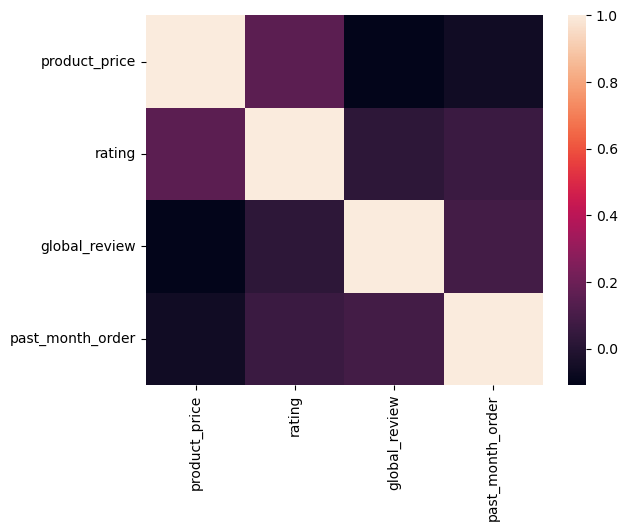

In [38]:
sns.heatmap(data = corr)

there is a negative corralation between product price and rating, increasing product price leads to decreasing number of rating and review

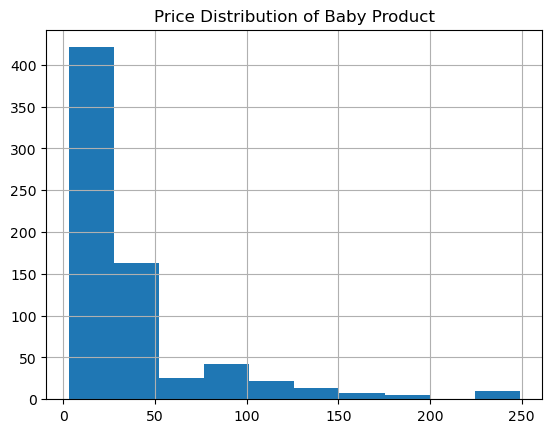

In [39]:
plt.title('Price Distribution of Baby Product')
data['product_price'].hist();

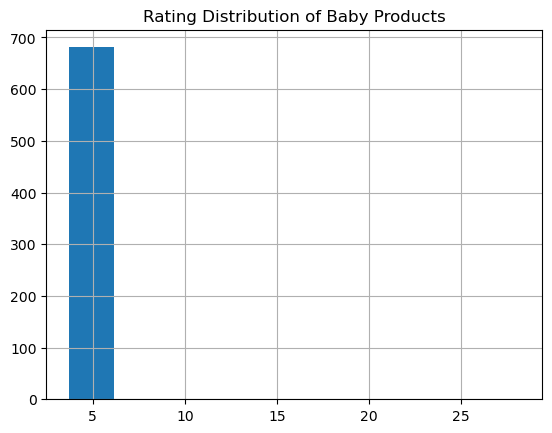

In [40]:
plt.title('Rating Distribution of Baby Products')
data['rating'].hist();

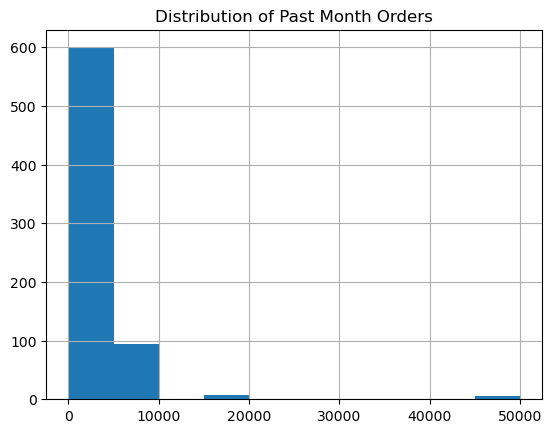

In [41]:
plt.title('Distribution of Past Month Orders')
data['past_month_order'].hist();

50% of the monthly orders are below 10000

C:\Users\GREATNESS\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


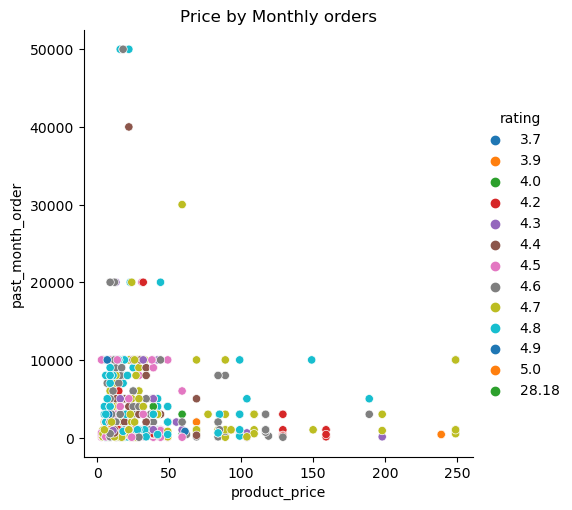

In [42]:

sns.relplot(data = data , x = 'product_price', y = 'past_month_order', hue = 'rating', palette = 'tab10')
plt.title('Price by Monthly orders');

C:\Users\GREATNESS\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


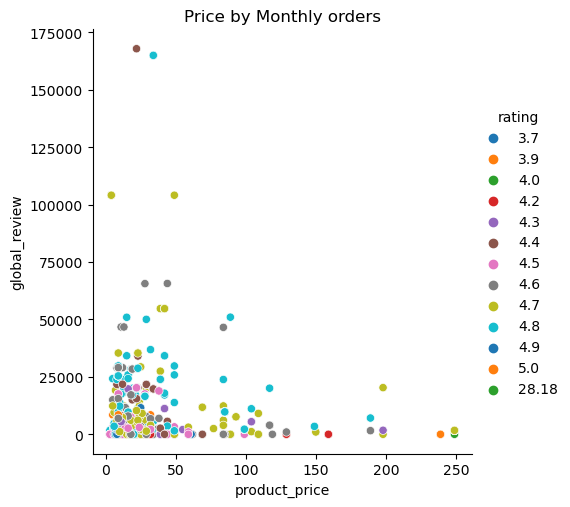

In [43]:

sns.relplot(data = data , x = 'product_price', y = 'global_review', hue = 'rating', palette = 'tab10')
plt.title('Price by Monthly orders');

## Top selling  Baby Products on Amazon

In [49]:

top = data.nlargest(10,'past_month_order')
print("Top 10 Most Ordered Baby Product")
top

Top 10 Most Ordered Baby Product


,product_name,product_price,rating,global_review,past_month_order
55,"Huggies Natural Care Sensitive Baby Wipes, Uns...",16,4.8,9049,50000
20,ULG 1 Pack Over Door Organizer with 5 Large Po...,18,4.6,0,50000
23,Aveeno Baby Bathtime Solutions Baby & Me Gift ...,22,4.8,20023,50000
4,"HIPHOP PANDA Baby Washcloths, Rayon Made from ...",42,NaN,0,50000
24,"Baby Car Seat Cover, Infant Carseat Canopy wit...",18,4.6,0,50000
9,"Portable Diaper Changing Pad, Portable Changin...",22,4.4,167830,40000
47,"Pampers Aqua Pure Sensitive Baby Wipes , 672 c...",59,4.7,3099,30000
33,Frida Baby The 3-Step Cradle Cap System | Derm...,31,4.5,0,20000
44,"Shynerk Baby Car Mirror, Safety Car Seat Mirro...",44,4.8,3573,20000
50,"NUK Comfy Orthodontic Pacifiers, 0-6 Months, T...",13,4.3,2524,20000


In [47]:
top.to_csv('Top_10_most_ordered_baby_product')

## Top 20 most order product over past month on Amazon


0. "Huggies Natural Care Sensitive Baby Wipes, Unscented, Hypoallergenic, 99% Purified Water, 12 Flip-Top Packs (768 Wipes Total)",
1. "ULG 1 Pack Over Door Organizer with 5 Large Pockets 10 Mesh Side Pockets, 44 lbs Weight Capacity Hanging Storage Organizer with Clear Window Kids Toys, Shoes, Diapers, Dark Grey, 5 Layers",
2. "Aveeno Baby Bathtime Solutions Baby & Me Gift Set with Baby Wash & Shampoo, Calming Baby Bath & Wash, Baby Daily Moisturizing Lotion & Stress Relief Body Wash for Mom, Soap-Free, 4 items",
3. "Baby Car Seat Cover, Infant Carseat Canopy with 3 Layers Windows, Breathable Mesh Peep Window, Kick-Proof Carrier Cover for Boys Girls, Windproof Stroller Cover Shower Gift for Newborn (Elephant)"
4. "Portable Diaper Changing Pad, Portable Changing pad for Newborn Girl & Boy - Baby Changing Pad with Smart Wipes Pocket – Waterproof Travel Changing Kit - Baby Gift by Kopi Baby",
5. "Pampers Aqua Pure Sensitive Baby Wipes , 672 count"
6. "Frida Baby The 3-Step Cradle Cap System | DermaFrida The FlakeFixer | Sponge, Brush, Comb and Storage Stand for Babies with Cradle Cap",
7. "Shynerk Baby Car Mirror, Safety Car Seat Mirror for Rear Facing Infant with Wide Crystal Clear View, Shatterproof, Fully Assembled, Crash Tested and Certified"
8. "NUK Comfy Orthodontic Pacifiers, 0-6 Months, Timeless Collection, 5 Count (Pack of 1)",
9. "b&h Digital Baby Thermometer, The Infant Baby Bath Floating Toy Safety Temperature Water Thermometer (Classic Duck)"


## Text Analysis on top product Discription

In [2]:
productDesc = ["Huggies Natural Care Sensitive Baby Wipes, Unscented, Hypoallergenic, 99% Purified Water, 12 Flip-Top Packs (768 Wipes Total)",
"ULG 1 Pack Over Door Organizer with 5 Large Pockets 10 Mesh Side Pockets, 44 lbs Weight Capacity Hanging Storage Organizer with Clear Window Kids Toys, Shoes, Diapers, Dark Grey, 5 Layers",
"Aveeno Baby Bathtime Solutions Baby & Me Gift Set with Baby Wash & Shampoo, Calming Baby Bath & Wash, Baby Daily Moisturizing Lotion & Stress Relief Body Wash for Mom, Soap-Free, 4 items",
"Baby Car Seat Cover, Infant Carseat Canopy with 3 Layers Windows, Breathable Mesh Peep Window, Kick-Proof Carrier Cover for Boys Girls, Windproof Stroller Cover Shower Gift for Newborn (Elephant)"
"Portable Diaper Changing Pad, Portable Changing pad for Newborn Girl & Boy - Baby Changing Pad with Smart Wipes Pocket – Waterproof Travel Changing Kit - Baby Gift by Kopi Baby",
"Pampers Aqua Pure Sensitive Baby Wipes , 672 count"
"Frida Baby The 3-Step Cradle Cap System | DermaFrida The FlakeFixer | Sponge, Brush, Comb and Storage Stand for Babies with Cradle Cap",
"Shynerk Baby Car Mirror, Safety Car Seat Mirror for Rear Facing Infant with Wide Crystal Clear View, Shatterproof, Fully Assembled, Crash Tested and Certified"
"NUK Comfy Orthodontic Pacifiers, 0-6 Months, Timeless Collection, 5 Count (Pack of 1)",
"b&h Digital Baby Thermometer, The Infant Baby Bath Floating Toy Safety Temperature Water Thermometer (Classic Duck)"]

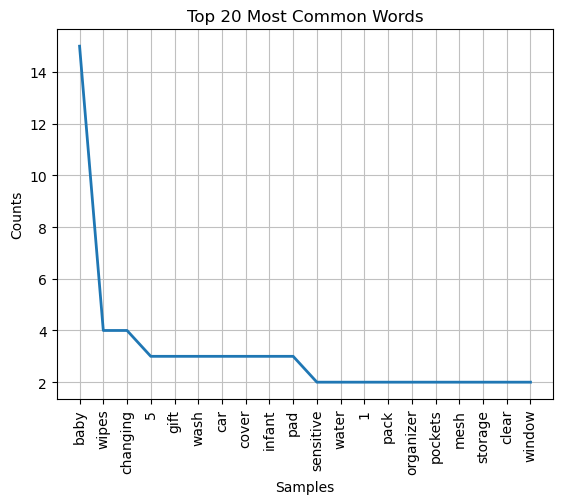

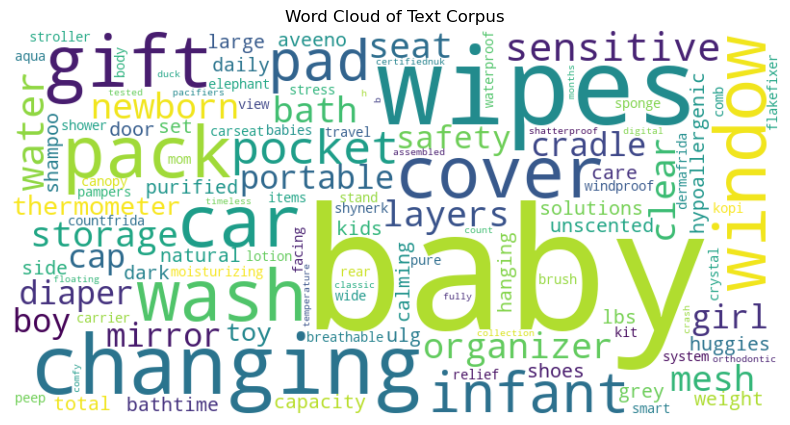

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Tokenization and Stopword Removal
stop_words = set(stopwords.words("english"))
word_tokens = []
for document in productDesc:
    words = word_tokenize(document)
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    word_tokens.extend(filtered_words)

# Frequency Distribution
fdist = FreqDist(word_tokens)
fdist.plot(20, title="Top 20 Most Common Words")

# Word Cloud Generation
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(word_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Text Baby Product Description")
plt.show()


## Analysis Insight

Baby products are highly rated by customers on amazon with average rating of 4.6 approximately. 
Average baby product price on amazon is 36.8 USD, with 75 percent of the product price between 3 to 39 USD.

there is a negative corralation between product price and rating
A careful text analysis reveal that baby diapers, baby washing and moistorizing products, baby safety acccessaries in this case, car seat cover and car watch mirrors and heath devices:  Digital Baby Thermometer

**Conclusion:**

The primary aim of this portfolio project was to uncover the top-selling baby products on Amazon, and I'm delighted to say that the mission has been accomplished. Through a combination of web scraping, data cleaning, and in-depth analysis, I've unraveled the fascinating world of baby products in the e-commerce giant's marketplace.

Our journey began by delving into Amazon's vast database to extract crucial product information. The data, once obtained, underwent meticulous cleaning, ensuring that we had a reliable and meaningful dataset to work with. Through the use of Python and libraries like BeautifulSoup, we overcame the challenges of navigating the ever-evolving e-commerce landscape.

Analyzing this data, I found that baby products enjoy remarkable popularity and customer satisfaction on Amazon. With an average customer rating of 4.6, these products are clearly a hit among consumers. Moreover, the average price of approximately 36.8 USD, coupled with the fact that 75 percent of products fall within the range of 3 to 39 USD, signifies affordability and accessibility for a wide range of shoppers.

Perhaps one of the most intriguing findings was the negative correlation between product price and customer rating. This correlation revealed that while more expensive baby products can indeed be exceptional, customers often expect more from premium-priced items, and when these expectations aren't met, the ratings tend to be lower. On the other hand, budget-friendly products may be rated more positively if they meet or exceed customer expectations. This insight is invaluable for both customers seeking the best value and sellers looking to refine their product offerings.

Moreover, our text analysis unveiled several standout product categories that are driving the success of baby products on Amazon. These include essentials like baby diapers, baby washing and moisturizing products, baby safety accessories, including car seat covers and car watch mirrors, and health devices such as the Digital Baby Thermometer. These categories have not only contributed to the high ratings but also to the sheer popularity of baby products.

In closing, this portfolio project has accomplished its primary goal – to identify the top-selling baby products on Amazon. It has helped to provide vital insight to local client who want to delve into baby product mini importation from Amazon. This knowledge is not just data; it's a testament to the thriving e-commerce ecosystem and the profound impact that data analytics can have on understanding consumer trends and market dynamics.

By documenting this journey in my portfolio, I aim to showcase my ability to translate data into actionable insights and to inspire others to explore the possibilities within the realm of data analysis. The world of e-commerce continues to evolve, and I'm excited to continue seeking answers and discovering opportunities within the vast landscape of data.

Thank you for joining me on this journey of exploration and analysis.

by: `Job Moses Ubeh`